# Plot the axion flux for Primakoff and LPlasmon

In [1]:
import sys
sys.path.append('../src')
from Params import *
from PlotFuncs import *
from Like import *
from AxionFuncs import *
import matplotlib.patheffects as pe


In [1]:
# Range of field strengths we will adopt for LPlasmon window
B_rad=5e3
B_tach=50.0
B_outer=3.0

B_rad_max = 30e6*1e-4
B_rad_min = 2e6*1e-4
print('B_rad between',B_rad_min/1e-4,B_rad_max/1e-4,'T')

B_tach_min = 4e4*1e-4
B_tach_max = 50e4*1e-4
print('B_tach between',B_tach_min/1e-4,B_tach_max/1e-4,'T')

B_outer_max = 4e4*1e-4
B_outer_min = 3e4*1e-4
print('B_outer between',B_outer_min/1e-4,B_outer_max/1e-4,'T')

B_rad between 2000000.0 30000000.0 T
B_tach between 40000.0 500000.0 T
B_outer between 30000.0 40000.0 T


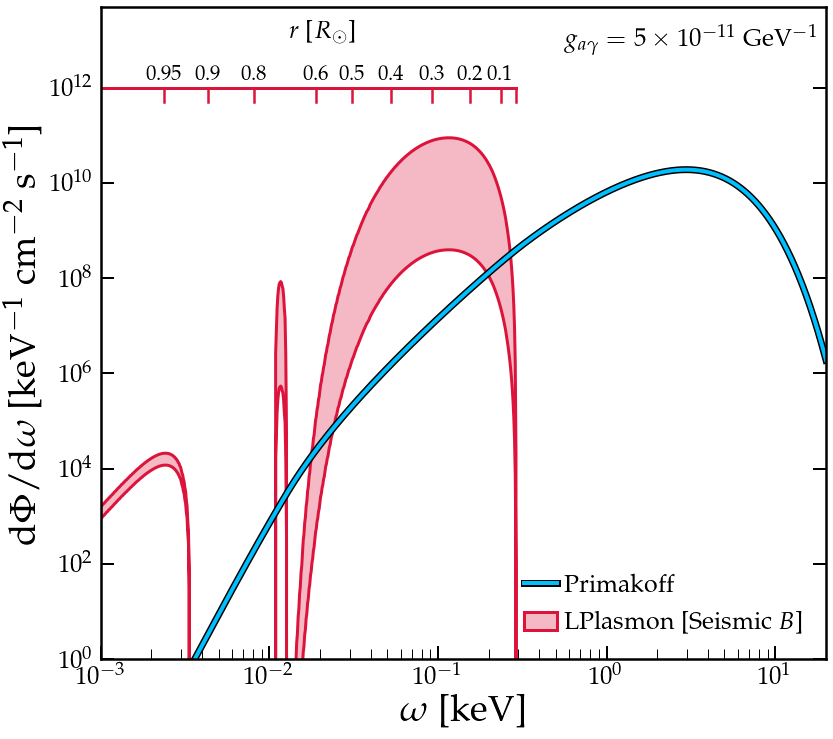

In [5]:
omega_vals = logspace(-3,log10(20.0),1000)

gag = 5e-11

# Primakoff flux
dPhi_Primakoff = AxionFlux_Primakoff_PlasmonCorrection(gag,omega_vals)

# Window for each region done separately:
dPhi_P1_upper = AxionFlux_Lplasmon(gag,omega_vals,B_model_seismic_rad(B_rad=B_rad_max))
dPhi_P1_lower = AxionFlux_Lplasmon(gag,omega_vals,B_model_seismic_rad(B_rad=B_rad_min))
dPhi_P2_upper = AxionFlux_Lplasmon(gag,omega_vals,B_model_seismic_tach(B_tach=B_tach_max))
dPhi_P2_lower = AxionFlux_Lplasmon(gag,omega_vals,B_model_seismic_tach(B_tach=B_tach_min))
dPhi_P3_upper = AxionFlux_Lplasmon(gag,omega_vals,B_model_seismic_outer(B_outer=B_outer_max))
dPhi_P3_lower = AxionFlux_Lplasmon(gag,omega_vals,B_model_seismic_outer(B_outer=B_outer_min))



# Plot:
fig,ax = MySquarePlot(r'$\omega$ [keV]',r'$\textrm{d}\Phi/\textrm{d}\omega$ [keV$^{-1}$ cm$^{-2}$ s$^{-1}$]',lfs=37)

pef= [pe.Stroke(linewidth=7, foreground='k'), pe.Normal()]

plt.plot(omega_vals,dPhi_Primakoff,'-',label='Primakoff',lw=4,color='deepskyblue',path_effects=pef)

col = col_alpha('crimson',0.3)
plt.fill_between(omega_vals,dPhi_P1_upper,dPhi_P1_lower,facecolor=col,lw=3,edgecolor='crimson')
plt.fill_between(omega_vals,dPhi_P2_upper,dPhi_P2_lower,facecolor=col,lw=3,edgecolor='crimson')
plt.fill_between(omega_vals,dPhi_P3_upper,dPhi_P3_lower,facecolor=col,lw=3,edgecolor='crimson',label='LPlasmon [Seismic $B$]')



# Add auxiliary r axis:
ymax = 1e12
r_vals = [0.95,0.9,0.8,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
for ri in r_vals:
    i_r = argmin(abs(r-ri))
    ax.plot([wp[i_r],wp[i_r]],[ymax,ymax/2],color='crimson',lw=2.5)
    if ri==0.1:
        plt.text(wp[i_r]*1.0,ymax*1.4,str(ri),fontsize=21,color='k',rotation=0,rotation_mode='anchor',horizontalalignment='center')
    elif ri>0.0:
        plt.text(wp[i_r]*1.0,ymax*1.5,str(ri),fontsize=21,color='k',rotation=0,rotation_mode='anchor',horizontalalignment='center')
    plt.plot([1e-4,wp[0]],[ymax,ymax],'-',color='crimson',zorder=2,alpha=1,lw=2.5)
plt.text(1.3e-2,ymax*9,r'$r$ [$R_\odot$]',color='k')
    
    
# Tweaking:
plt.ylim([1e0,5e13])
plt.xlim([1e-3,20.0])
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(frameon=False,handletextpad=0.3,handlelength=1.3,loc='lower right')
plt.gcf().text(0.89,0.83,r'$g_{a\gamma} = 5\times10^{-11}$ GeV$^{-1}$',horizontalalignment='right')
ax.tick_params(which='major',top=False)
ax.tick_params(which='minor',top=False)


# Save figure
MySaveFig(fig,'PlasmonFluxes')

# Save copies of the LPlasmon flux for future quick access:

In [4]:
# Use same shape as others:
omega_i,dPhi_P_i = loadtxt('../data/solar/PrimakoffFlux_PlasmonCorrected.txt',unpack=True)

DAT = column_stack((omega_i,AxionFlux_Lplasmon(gag,omega_i,B_model_seismic())))
savetxt('../data/solar/LPlasmonFlux_SeismicB.txt',DAT)

DAT = column_stack((omega_i,AxionFlux_Lplasmon(gag,omega_i,B_model_constant())))
savetxt('../data/solar/LPlasmonFlux_ConstantB.txt',DAT)

DAT = column_stack((omega_i,AxionFlux_Lplasmon(gag,omega_i,B_model_step())))
savetxt('../data/solar/LPlasmonFlux_StepB.txt',DAT)